In [27]:
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy as sp

In [2]:
X, y = make_regression(n_samples=1000, n_features=4, noise=0.1)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
df['Target'] = y

In [3]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Target
0,0.266343,-0.141934,-1.362917,-0.374309,-145.194982
1,-1.068757,-0.085923,-0.614181,-1.021669,-151.132552
2,-1.421644,-1.242070,-0.457977,1.728320,-139.444908
3,-1.424671,-0.234041,-2.970143,-1.342265,-417.954210
4,0.244229,1.183629,0.642174,0.509685,185.275040


# ASSUMPTIONS OF LINEAR REGRESSION

## **LINEAR RELATIONSHIP BETWEEN INPUT AND OUTPUT**
- It simply states that there should be a linear relationship between input and output

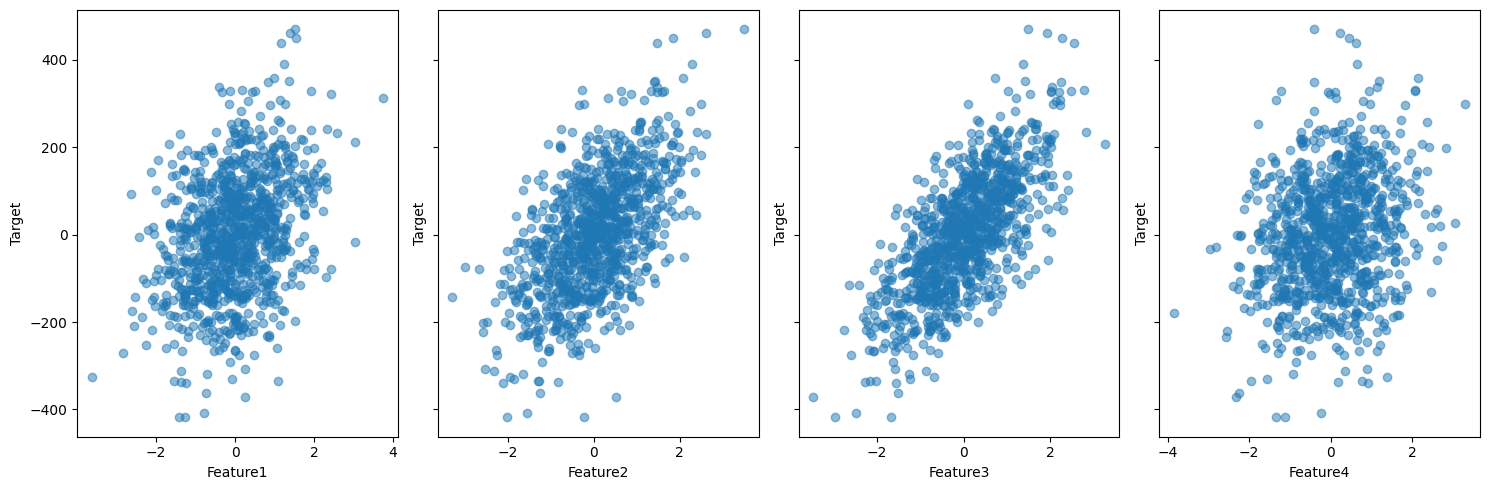

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

for i, col in enumerate(df.columns[:-1]):  # Excluding the target column
    axes[i].scatter(df[col], df['Target'], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Target')

plt.tight_layout()
plt.show()

## NO MULTICOLLINEARITY
- Meaning independent variables are not highly correlated with each other.
- We can use two methods for checking multicollinearity  
   - Varinace Inflation Factor(VIF): It is a measure of the amount of  
     multicollinearity in a set of multiple regression variables.In general,a VIF above 10 indicates high correlation
   - We can simply calculate the correlation between the inputs.It can give us
   an idea about collinearity between inputs
   

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop('Target', axis=1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    Feature       VIF
0  Feature1  1.003876
1  Feature2  1.004900
2  Feature3  1.001606
3  Feature4  1.003328


In [11]:
X.corr()

,Feature1,Feature2,Feature3,Feature4
Feature1,1.000000,0.055777,0.018919,-0.023988
Feature2,0.055777,1.000000,0.013832,-0.042054
Feature3,0.018919,0.013832,1.000000,-0.033843
Feature4,-0.023988,-0.042054,-0.033843,1.000000


<Axes: >

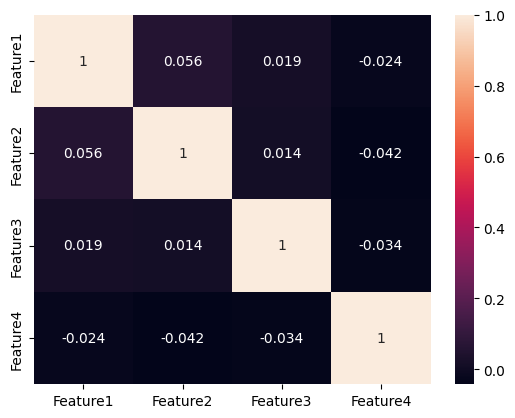

In [16]:
sns.heatmap(X.corr(),annot=True)

## NORMALITY OF RESIDUAL
- Residuals (the differences between observed and predicted values) should be normally distributed.
    - Normality can be checked using QQ-plot : If the plot makes a near to perfect line, then the distribution is said to be normally distributed

In [20]:
LinReg = LinearRegression()

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (800, 4) Target: (800,)
Testing set - Features: (200, 4) Target: (200,)


In [22]:
LinReg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = LinReg.predict(X_test)
residual = y_test - y_pred

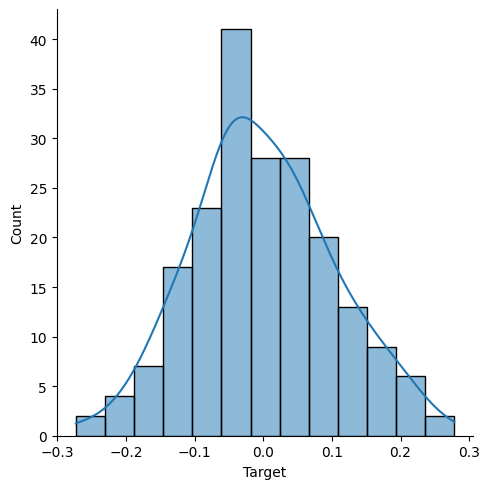

In [26]:
sns.displot(residual,kde=True)

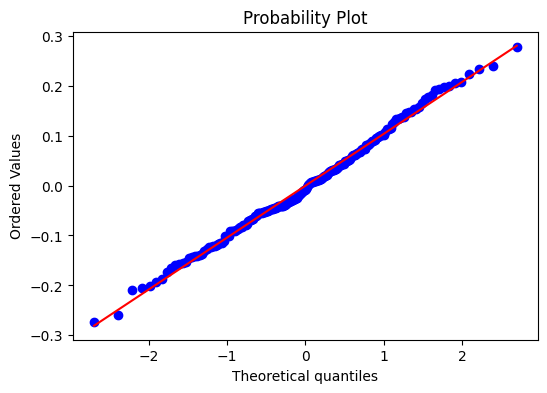

In [28]:
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

## HOMOSCEDASTICITY
- It means that the variance of the residuals is constant across all levels of the independent variables.


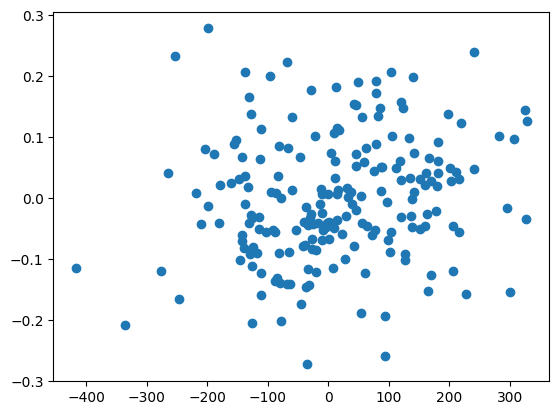

In [29]:
plt.scatter(y_pred,residual)

## NO AUTOCORRELATION OF ERRORS
- AUTOCORRELATION VIOLATES THE ASSUMPTION OF INDEPENDENCE BETWEEN INPUT VARIBALES.
- THERE SHOULD NO PATTERN BETWEEN THE ERRORS(RESIDUALS)

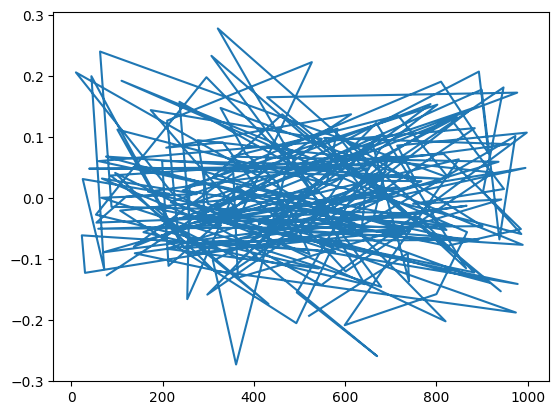

In [30]:
plt.plot(residual)